<a href="https://colab.research.google.com/github/KayKozaronek/03_Courses/blob/master/Course_2_Part_6_Lesson_3_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
  
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150,150,3),
                                include_top = False,
                                weights =None)

pre_trained_model.load_weights(local_weights_file)

# Freeze the weights
for layer in pre_trained_model.layers:
  layer.trainable = False

# pre_trained_model.summary()

last_layer = pre_trained_model.get_layer("mixed7")
print("last layer output shape: ", last_layer.output_shape)
last_output = last_layer.output

--2020-05-06 09:31:05--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.203.128, 2607:f8b0:400e:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   159MB/s    in 0.5s    

2020-05-06 09:31:06 (159 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]

last layer output shape:  (None, 7, 7, 768)


In [0]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)

# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation = "relu")(x)

# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)

# Add a final sigmoid layer for classification
x = layers.Dense(1, activation ="sigmoid")(x)

model = Model(pre_trained_model.input, x)

model.compile(optimizer = RMSprop(lr=1e-4),
              loss ="binary_crossentropy",
              metrics=["accuracy"])

In [11]:
!wget --no-check-certificate \
        https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
       -O /tmp/cats_and_dogs_filtered.zip

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os 
import zipfile 

local_zip = "//tmp/cats_and_dogs_filtered.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/tmp")
zip_ref.close()

# Define our example directories and files 

base_dir  = "/tmp/cats_and_dogs_filtered"

train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "validation")

train_cats_dir = os.path.join(train_dir, "cats")
train_dogs_dir = os.path.join(train_dir, "cats")
val_cats_dir = os.path.join(val_dir, "cats")
val_dogs_dir = os.path.join(val_dir, "dogs")

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    zoom_range = 0.2,
    shear_range = 0.2,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range =0.2,
    horizontal_flip = True
)

# Note that the valitadion data should not be augmented!
test_datagen = ImageDataGenerator(rescale = 1./255.)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    class_mode="binary",
                                                    batch_size= 20,
                                                    target_size = (150,150))

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(val_dir,
                                                       class_mode = "binary",
                                                       target_size = (150,150),
                                                       batch_size = 20)


--2020-05-06 09:48:17--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.28.128, 2607:f8b0:400e:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.28.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   110MB/s    in 0.6s    

2020-05-06 09:48:18 (110 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
history = model.fit(
    train_generator,
    validation_data = validation_generator,
    steps_per_epoch = 100,
    epochs = 20,
    validation_steps = 50,
    verbose = 1
)

Epoch 1/20
100/100 [==============================] - 154s 2s/step - loss: 0.2993 - accuracy: 0.8735 - val_loss: 0.1183 - val_accuracy: 0.9540
Epoch 2/20
100/100 [==============================] - 149s 1s/step - loss: 0.2333 - accuracy: 0.9080 - val_loss: 0.1354 - val_accuracy: 0.9450
Epoch 3/20
100/100 [==============================] - 150s 2s/step - loss: 0.1890 - accuracy: 0.9285 - val_loss: 0.1111 - val_accuracy: 0.9660
Epoch 4/20
100/100 [==============================] - 151s 2s/step - loss: 0.1792 - accuracy: 0.9365 - val_loss: 0.1035 - val_accuracy: 0.9600
Epoch 5/20
100/100 [==============================] - 154s 2s/step - loss: 0.2075 - accuracy: 0.9285 - val_loss: 0.1089 - val_accuracy: 0.9660
Epoch 6/20
100/100 [==============================] - 149s 1s/step - loss: 0.1825 - accuracy: 0.9390 - val_loss: 0.2012 - val_accuracy: 0.9320
Epoch 7/20
100/100 [==============================] - 149s 1s/step - loss: 0.1418 - accuracy: 0.9525 - val_loss: 0.1115 - val_accuracy: 0.9680

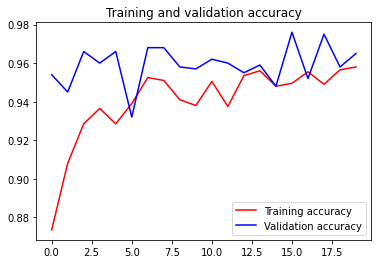

<Figure size 432x288 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt
% matplotlib inline
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs, acc, "r", label = "Training accuracy")
plt.plot(epochs, val_acc, "b", label = "Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend(loc=0)
plt.figure()

plt.show()